In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

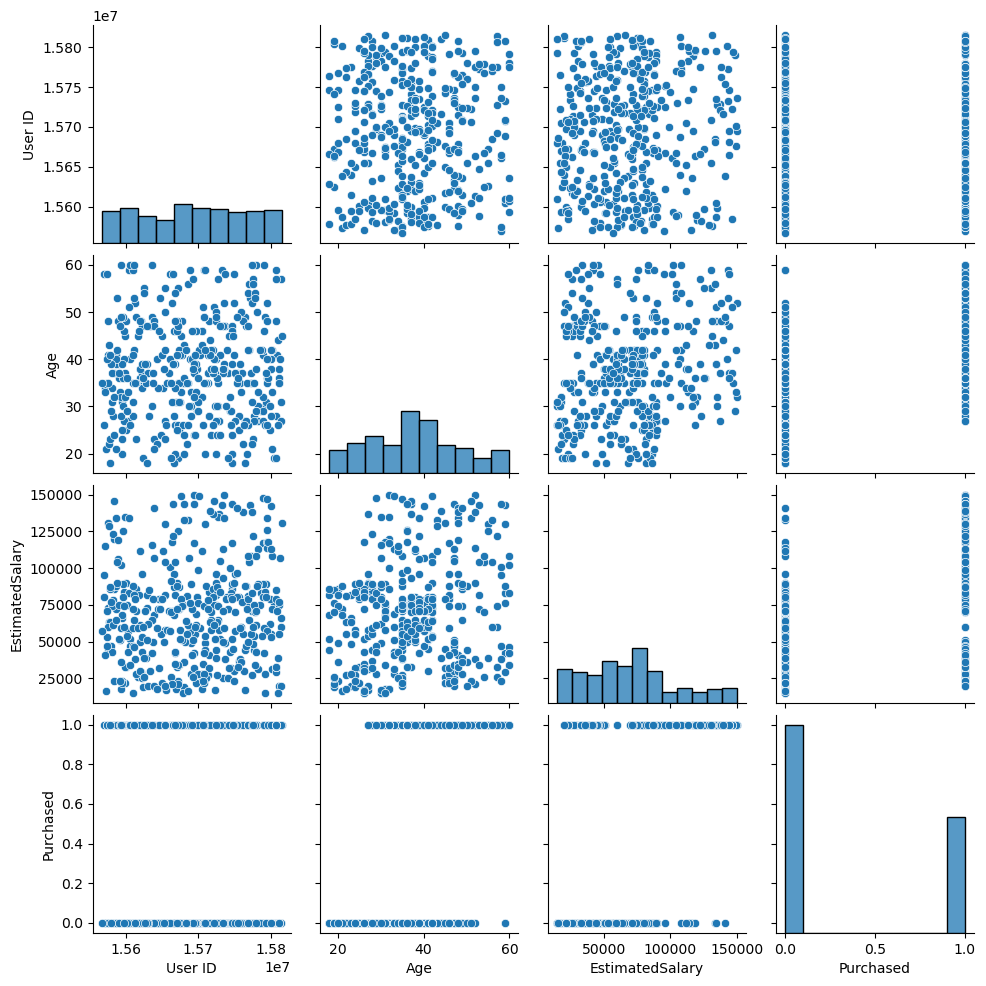

In [6]:
sns.pairplot(df)

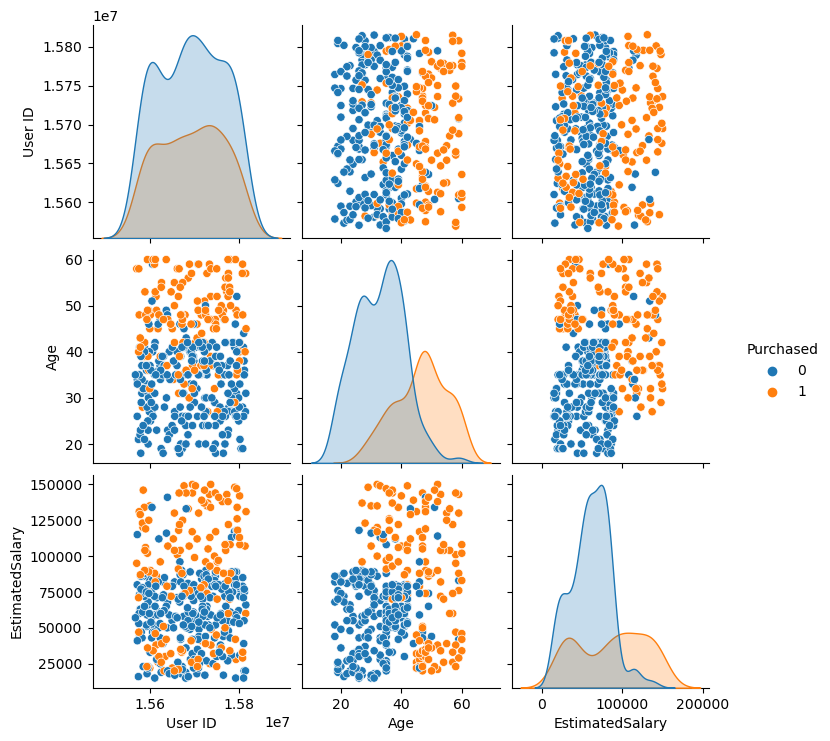

In [7]:
sns.pairplot(df, hue="Purchased")

In [8]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# KNN Algo

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
x = df.iloc[:,[2,3]]
y = df.iloc[:,-1]

In [11]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
xtrain 

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [15]:
ytrain

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64

In [16]:
xtest

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


In [17]:
ytest

132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)

print(f"Accuracy:- {ac}\n {cm}\n {cr}")

Accuracy:- 0.84
 [[64  4]
 [12 20]]
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        68
           1       0.83      0.62      0.71        32

    accuracy                           0.84       100
   macro avg       0.84      0.78      0.80       100
weighted avg       0.84      0.84      0.83       100



In [20]:
49+16

65

In [21]:
49/65

0.7538461538461538

In [22]:
49+9

58

In [23]:
49/58

0.8448275862068966

In [24]:
train = knn.score(xtrain,ytrain)
test = knn.score(xtest,ytest)

print(f"Training Accuracy :- {train}\nTesting Accuracy:- {test}")

Training Accuracy :- 0.8533333333333334
Testing Accuracy:- 0.84


In [25]:
#High Accuracy ---Low Training Error ---Low Bias
#Low Accuracy ----High Testing Error ---High Variance

#Low Bias + High Variance = Overfitting

# Hyperparameter Tuning

In [33]:
trainac = []
testac = []
                                                                                            
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain) 
        
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)
    print(f"{train} and {test}")

1.0 and 0.84
0.88 and 0.77
0.88 and 0.78
0.84 and 0.81
0.8733333333333333 and 0.83
0.8533333333333334 and 0.84
0.8366666666666667 and 0.81
0.83 and 0.84
0.8266666666666667 and 0.84
0.8133333333333334 and 0.82
0.8533333333333334 and 0.89
0.82 and 0.84
0.82 and 0.84
0.7966666666666666 and 0.84
0.7966666666666666 and 0.86
0.8033333333333333 and 0.85
0.7933333333333333 and 0.85
0.7933333333333333 and 0.84
0.8133333333333334 and 0.87
0.8133333333333334 and 0.84
0.81 and 0.85
0.8066666666666666 and 0.83
0.81 and 0.84
0.8 and 0.84
0.8066666666666666 and 0.83
0.8066666666666666 and 0.83
0.81 and 0.79
0.82 and 0.83
0.8066666666666666 and 0.81
0.8 and 0.83


In [26]:
trainac = []
testac = []
                                                                                            
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain) 
        
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

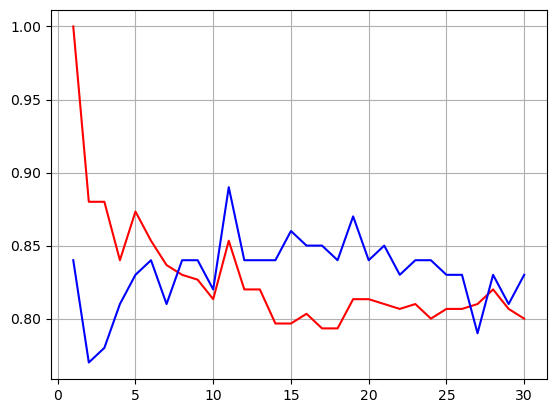

In [27]:
plt.plot(range(1,31), trainac , color="red")
plt.plot(range(1,31), testac , color="blue")
plt.grid()
plt.show()

# Forecast New Observation

In [28]:
age = 21

es = 72000

newob = [[age,es]]
knn.predict(newob)[0]

0

In [29]:
def purchase():
    age = float(input("Enter Customer Age:- "))
    es = float(input("Enter Customer Salary:- "))
    
    newob = [[age,es]]
    yp = knn.predict(newob)[0]
    
    if yp==1:
        print("Yes, The Customer Will Definetly Purchase The Product...!!!")
    else:
        print("No, The Customer Will Not At All Purchase The Product...!!!!")
    return yp

In [30]:
purchase()

Enter Customer Age:- 55
Enter Customer Salary:- 50000
No, The Customer Will Not At All Purchase The Product...!!!!


0